## 1. 處理資料
* Impute
* 刪除資料

In [230]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.impute import KNNImputer
from matplotlib import pyplot
import seaborn as sns

In [231]:
data = pd.read_csv("Data.csv")

In [232]:
data.head()

,Unnamed: 0,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,NaN,2141-10-05 15:15:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [233]:
data = data.drop(data.columns[0],axis=1)

In [234]:
data.head()

,icustay_id,leavetime,los,intime,outtime,first_careunit,admittime,deathtime,dischtime,dob,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,2185-09-04 21:48:19.000,2185-09-14 17:46:08.000,MICU,2185-09-01 03:19:00.000,2185-09-14 15:30:00.000,2185-09-14 15:30:00.000,2127-12-23 00:00:00.000,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,2141-09-10 23:14:32.000,2141-09-14 19:59:19.000,MICU,2141-09-10 23:13:00.000,NaN,2141-10-05 15:15:00.000,2063-12-13 00:00:00.000,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,2157-01-06 10:36:14.000,2157-01-07 17:51:42.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,2157-01-12 16:59:09.000,2157-01-13 18:02:43.000,CCU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,2157-01-19 18:53:02.000,2157-02-02 15:40:15.000,MICU,2157-01-06 10:35:00.000,NaN,2157-02-08 15:30:00.000,2099-11-05 00:00:00.000,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [235]:
All_num = data.select_dtypes(include=['float64','int'])
#All_num['mortality_90d'] = data.mortality_90d

In [236]:
All_num.head()

,icustay_id,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
0,298201,233.694722,9.8318,58,1,15.0,6.0,0.0,3.0,1.0,...,17.718750,37.222222,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333
1,204941,NaN,3.8644,78,0,15.0,4.0,0.0,1.0,1.0,...,18.033333,36.111111,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000
2,256303,NaN,1.3024,58,0,13.0,6.0,4.0,3.0,0.0,...,18.000000,36.111111,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000
3,222141,NaN,1.0441,58,0,15.0,6.0,5.0,4.0,0.0,...,21.400000,36.222221,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000
4,266076,NaN,13.8661,58,0,15.0,6.0,5.0,4.0,0.0,...,30.156627,36.000002,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000


In [237]:
## 保留所有數據都有數值之資料
All_num.lactate_max[All_num.lactate_max.isna()]

2       NaN
3       NaN
8       NaN
9       NaN
14      NaN
         ..
14803   NaN
14807   NaN
14808   NaN
14809   NaN
14810   NaN
Name: lactate_max, Length: 6011, dtype: float64

In [243]:
All_shape = All_num
for n in All_num.columns[2:]:
    All_shape = All_shape[-All_shape[n].isna()]

In [244]:
All_shape.lactate_max[All_shape.lactate_max.isna()]

Series([], Name: lactate_max, dtype: float64)

In [247]:
print(All_shape.shape)
All_shape = All_shape.drop("leavetime",axis=1)
All_shape.head()

(573, 90)


,icustay_id,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
6,208879,3.4156,65,0,15.0,5.0,0.0,4.0,1.0,12.0,...,16.720000,36.777776,37.111113,36.966666,98.0,100.0,99.650000,164.0,267.0,195.666667
84,281690,34.5145,30,0,15.0,1.0,0.0,1.0,1.0,15.0,...,17.000000,35.888888,40.166668,38.726190,75.0,96.0,90.129032,76.0,138.0,108.142857
86,250110,3.3317,66,1,15.0,1.0,0.0,1.0,1.0,20.0,...,28.574468,37.388891,39.777777,38.500000,91.0,100.0,95.540541,158.0,337.0,265.208333
180,239427,7.1455,67,1,14.0,6.0,5.0,3.0,0.0,6.0,...,25.361905,35.055556,37.055556,36.092593,43.0,100.0,92.804124,64.0,148.0,95.000000
188,253155,24.8361,63,0,15.0,1.0,0.0,1.0,1.0,11.0,...,18.054054,37.444444,38.222222,37.879630,91.0,100.0,95.035714,70.0,363.0,159.550000


In [218]:
## base on KNN k-Nearest Neighbors
Imputer = KNNImputer(n_neighbors=2)
imput_data = All_num.drop(['icustay_id','mortality_90d','age_score','leavetime','los'],axis=1)
imput_data_name = imput_data.columns
imput_data = Imputer.fit_transform(imput_data)
imput_data = pd.DataFrame(imput_data)
imput_data.columns = imput_data_name
imput_data['mortality_90d'] = data['mortality_90d']
imput_data['los'] = data['los']
imput_data.head()


,age,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,albumin_min,albumin_max,...,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean,mortality_90d,los
0,58.0,15.0,6.0,0.0,3.0,1.0,17.0,17.0,2.40,2.45,...,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333,1,9.8318
1,78.0,15.0,4.0,0.0,1.0,1.0,13.0,13.0,2.30,2.30,...,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000,0,3.8644
2,58.0,13.0,6.0,4.0,3.0,0.0,16.0,16.0,2.45,2.45,...,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000,0,1.3024
3,58.0,15.0,6.0,5.0,4.0,0.0,12.0,14.0,2.20,2.20,...,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000,0,1.0441
4,58.0,15.0,6.0,5.0,4.0,0.0,13.0,16.0,2.60,2.60,...,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000,0,13.8661


## 2. Feature selection

In [31]:
## 以類別計算p值
p = []
for variable in All_num.columns[1:]:
    print(variable)
    print("Death :",len(All_num[variable].dropna()[All_num.mortality_90d==1]), "\n",
          "Live :",len(All_num[variable].dropna()[All_num.mortality_90d==0]))
    print (scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0]))
    
    p.append(scipy.stats.ttest_ind(All_num[variable].dropna()[All_num.mortality_90d==1],
                         All_num[variable].dropna()[All_num.mortality_90d==0])[1])

leavetime
Death : 3032 
 Live : 107
Ttest_indResult(statistic=-0.7217140901921415, pvalue=0.47052406603527497)
los
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=4.524115640507156, pvalue=6.112005241921071e-06)
age
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=21.751546349623244, pvalue=2.745279289522603e-103)
mortality_90d
Death : 4693 
 Live : 10118
Ttest_indResult(statistic=inf, pvalue=0.0)
mingcs
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-11.084469760069329, pvalue=1.9315505072324684e-28)
gcsmotor
Death : 4631 
 Live : 9978
Ttest_indResult(statistic=-6.848049413504915, pvalue=7.785255217844229e-12)
gcsverbal
Death : 4656 
 Live : 10028
Ttest_indResult(statistic=-5.7757728126433925, pvalue=7.815137772428747e-09)
gcseyes
Death : 4665 
 Live : 10065
Ttest_indResult(statistic=-6.181942529741663, pvalue=6.498737451021142e-10)
endotrachflag
Death : 4684 
 Live : 10102
Ttest_indResult(statistic=-0.3362517828854311, pvalue=0.7366857789395874)
aniongap_min
Death :

Ttest_indResult(statistic=-1.7477960297131214, pvalue=0.08052024784462752)
glucose_max_y
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-0.6512378162132934, pvalue=0.5149031708210614)
glucose_mean
Death : 4645 
 Live : 10045
Ttest_indResult(statistic=-0.6079926808815358, pvalue=0.5432017287432849)


In [32]:
All_num.sapsii_prob

0        0.285486
1        0.025876
2        0.181020
3        0.196366
4        0.247443
           ...   
14806    0.247443
14807    0.009611
14808    0.037205
14809    0.680887
14810    0.414604
Name: sapsii_prob, Length: 14811, dtype: float64

In [42]:
np.vstack((All_num.columns[1:], p)).T

array([['leavetime', 0.47052406603527497],
       ['los', 6.112005241921071e-06],
       ['age', 2.745279289522603e-103],
       ['mortality_90d', 0.0],
       ['mingcs', 1.9315505072324684e-28],
       ['gcsmotor', 7.785255217844229e-12],
       ['gcsverbal', 7.815137772428747e-09],
       ['gcseyes', 6.498737451021142e-10],
       ['endotrachflag', 0.7366857789395874],
       ['aniongap_min', 2.7572647299998576e-96],
       ['aniongap_max', 1.0364682960446766e-100],
       ['albumin_min', 9.36647999958637e-38],
       ['albumin_max', 9.523650622333575e-34],
       ['bands_min', 0.3791653429078856],
       ['bands_max', 0.3215419576326136],
       ['bicarbonate_min', 1.6308352702768077e-33],
       ['bicarbonate_max', 1.552516037451314e-23],
       ['bilirubin_min', 5.662174421536918e-46],
       ['bilirubin_max', 5.049130311219131e-46],
       ['creatinine_min', 1.3328957291142455e-17],
       ['creatinine_max', 1.3902639200354101e-14],
       ['chloride_min', 1.166087002090873e-06],

Text(0.5, 1.0, 'los \n p value : 6.112005241921071e-06')

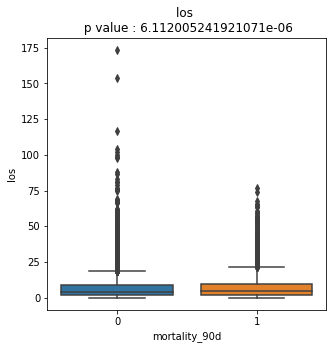

In [47]:
plt.figure(figsize=(5,5))
sns.boxplot(data=All_num,x="mortality_90d",y="los").set_title("los \n p value : 6.112005241921071e-06")


In [34]:
All_num['age_score']
All_num['age_score'].unique()

array([0])

In [17]:
## 相似性分析
All_cor = All_num.drop(['icustay_id','age_score'],axis=1).corr()
All_cor

,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
leavetime,1.000000,0.569297,-0.084241,-0.012885,0.071032,0.070719,0.064575,0.052535,-0.017272,-0.198030,...,-0.130705,0.010842,0.027130,0.034996,0.183702,0.094096,0.183048,-0.022545,-0.044039,-0.037995
los,0.569297,1.000000,-0.064659,0.037151,-0.029394,-0.182682,-0.223500,-0.191961,0.204937,-0.002386,...,0.041563,0.013441,0.126985,0.110638,-0.030570,0.055705,0.037464,-0.013160,0.005743,0.006679
age,-0.084241,-0.064659,1.000000,0.175954,-0.038984,0.044376,0.021351,0.030442,-0.053848,0.010828,...,-0.031783,-0.132521,-0.178707,-0.188663,-0.051968,-0.019004,-0.042397,0.029838,0.004512,0.005733
mortality_90d,-0.012885,0.037151,0.175954,1.000000,-0.090787,-0.056571,-0.047613,-0.050873,-0.002765,0.171726,...,0.118549,-0.121838,-0.098389,-0.135088,-0.103081,-0.029221,-0.080136,-0.014420,-0.005373,-0.005017
mingcs,0.071032,-0.029394,-0.038984,-0.090787,1.000000,0.296092,0.184151,0.317688,0.355284,-0.019088,...,-0.033255,0.033008,-0.021424,0.001454,0.017645,-0.035494,-0.014898,-0.004727,-0.016596,-0.017578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spo2_max,0.094096,0.055705,-0.019004,-0.029221,-0.035494,-0.043937,-0.105262,-0.073517,0.075509,-0.098123,...,-0.100564,0.005067,0.060961,0.044318,0.230193,1.000000,0.673796,-0.066971,0.002433,0.000875
spo2_mean,0.183048,0.037464,-0.042397,-0.080136,-0.014898,-0.057109,-0.139067,-0.098010,0.116689,-0.156882,...,-0.232720,0.031508,0.045152,0.052424,0.636151,0.673796,1.000000,-0.050615,0.005149,0.003256
glucose_min_y,-0.022545,-0.013160,0.029838,-0.014420,-0.004727,0.050107,0.038431,0.032534,-0.039721,0.037169,...,0.037912,0.058844,-0.013193,0.014760,0.016734,-0.066971,-0.050615,1.000000,0.002434,0.026230
glucose_max_y,-0.044039,0.005743,0.004512,-0.005373,-0.016596,-0.000714,-0.007147,-0.007429,-0.004996,-0.011245,...,-0.002039,0.000593,-0.005228,-0.003004,0.001535,0.002433,0.005149,0.002434,1.000000,0.999502


In [18]:
## 與leavetime相關性
dict(All_cor.leavetime)

{'leavetime': 1.0,
 'los': 0.5692970404025298,
 'age': -0.08424090581310326,
 'mortality_90d': -0.012884627649446046,
 'mingcs': 0.07103247254290834,
 'gcsmotor': 0.0707188188674125,
 'gcsverbal': 0.06457454989763413,
 'gcseyes': 0.05253455382278812,
 'endotrachflag': -0.017272454969821577,
 'aniongap_min': -0.19802988305808691,
 'aniongap_max': -0.18197116522617637,
 'albumin_min': 0.024550560391094066,
 'albumin_max': 0.05715037696477305,
 'bands_min': -0.11970662315628197,
 'bands_max': -0.09216144265301437,
 'bicarbonate_min': 0.11829024798147167,
 'bicarbonate_max': 0.0993114357410496,
 'bilirubin_min': -0.02697499736283746,
 'bilirubin_max': -0.021563114483038687,
 'creatinine_min': -0.08685451332633914,
 'creatinine_max': -0.09112907756131805,
 'chloride_min': 0.04843431514867027,
 'chloride_max': 0.0254299920594563,
 'glucose_min_x': -0.023732796528933276,
 'glucose_max_x': -0.04681988675191676,
 'hematocrit_min': -0.12157369892849806,
 'hematocrit_max': -0.10193295015600481,
 

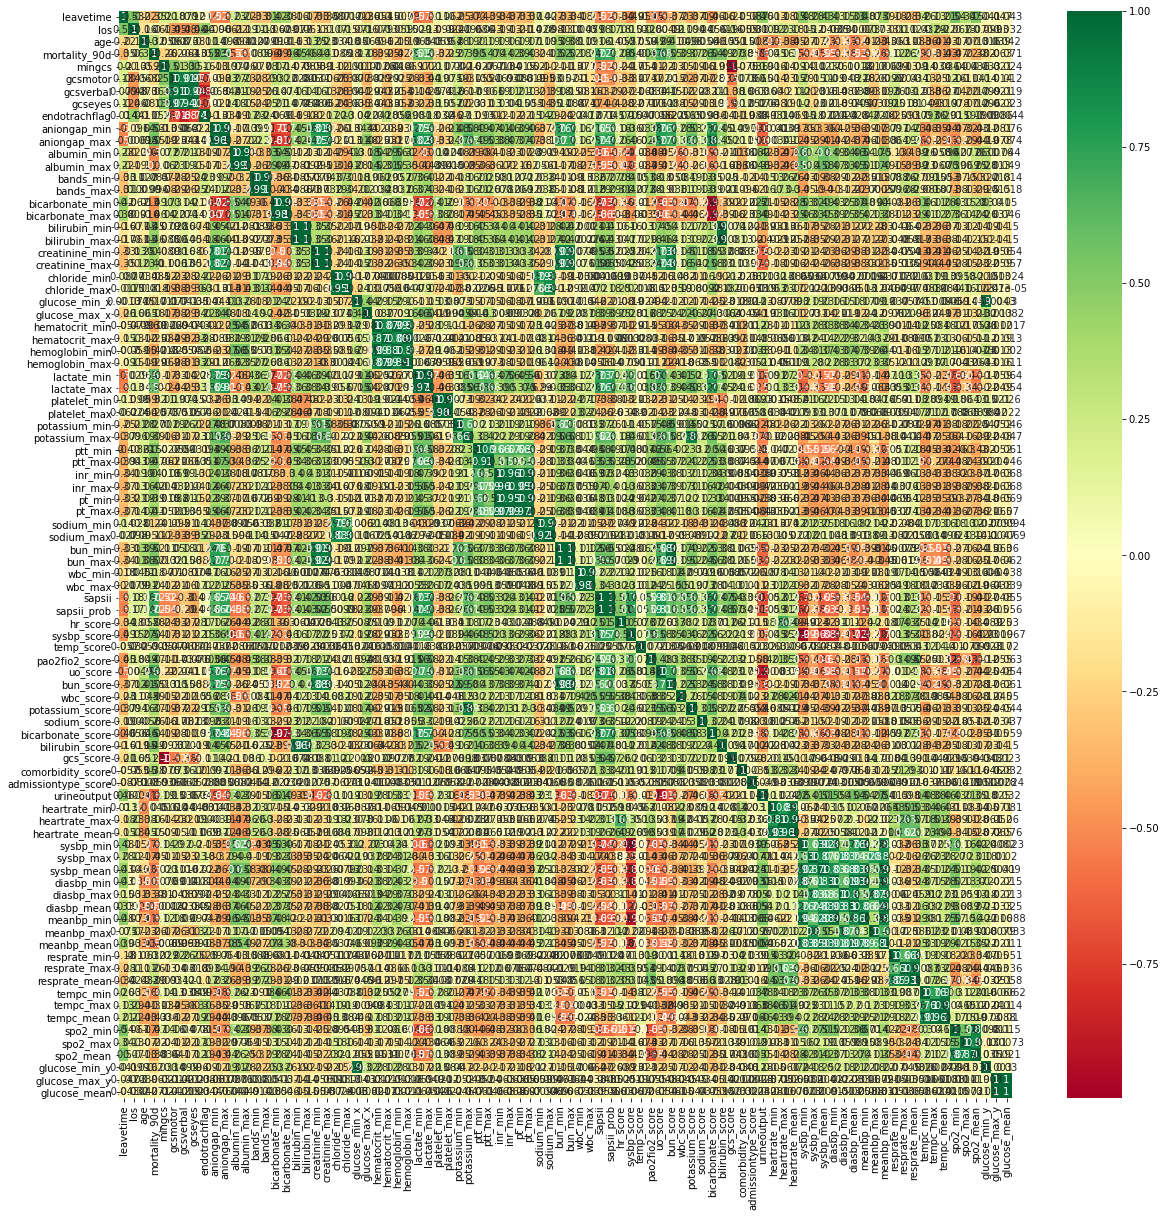

In [19]:
top_corr_features = All_cor.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(All_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.01248515 0.01340599 0.01207784 0.00691193 0.00994533 0.00627854
 0.00716469 0.00595742 0.00439153 0.00699214 0.00668705 0.00441589
 0.00507164 0.01395202 0.00567814 0.01272461 0.01032095 0.00758691
 0.00579112 0.0055636  0.00530615 0.00826396 0.00733741 0.02958294
 0.01257808 0.02728246 0.02504066 0.03474263 0.01484314 0.01146568
 0.00539004 0.00387851 0.0016047  0.0037947  0.0099857  0.00846308
 0.01507141 0.02029385 0.01892703 0.0105175  0.00494526 0.00181873
 0.00398182 0.00294523 0.00786817 0.00791171 0.01033349 0.00564528
 0.00765502 0.         0.021206   0.00822932 0.02331489 0.00382121
 0.00515074 0.00207225 0.00344271 0.02353045 0.00337348 0.01358885
 0.00577535 0.01480108 0.00119265 0.00102483 0.01110167 0.03664057
 0.00654755 0.00331623 0.0206408  0.007343   0.00803125 0.00649926
 0.00263127 0.01149714 0.01658707 0.01610796 0.00798846 0.00998258
 0.01205305 0.01259686 0.03534917 0.01447017 0.03110379 0.0064213
 0.00790457 0.0097124  0.04643379 0.01170449 0.02593495]


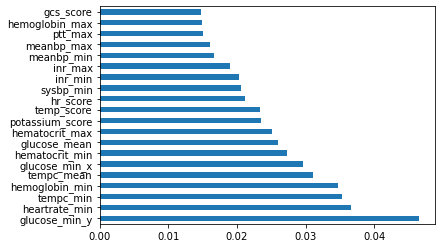

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(All_shape.drop(["mortality_90d"],axis=1),All_shape.mortality_90d)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=All_shape.drop(["mortality_90d"],axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.         0.09814241 0.35443854 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01830978 0.         0.         0.2180298  0.
 0.         0.         0.         0.         0.04849928 0.
 0.         0.         0.02261806 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1116689
 0.         0.         0.         0.         0.         0.
 0.         0.02849564 0.06585635 0.03394123 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


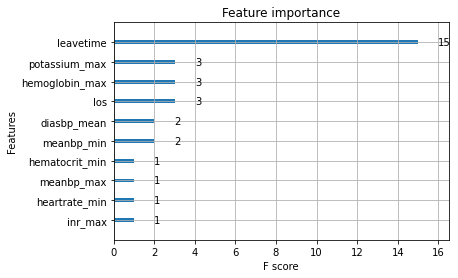

In [24]:
from xgboost import XGBClassifier

from xgboost import plot_importance
model = XGBClassifier()
model.fit(All_shape.drop(["mortality_90d"],axis=1),All_shape.mortality_90d)
# feature importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

<AxesSubplot:>

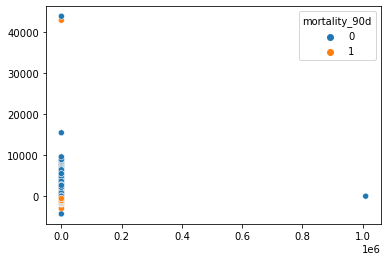

In [86]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)


In [129]:
np.where(pca[:,0]==max(pca[:,0]))
imput_data.index = [n for n in range(imput_data.shape[0])]
imput_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809,
            14810],
           dtype='int64', length=14811)

<AxesSubplot:>

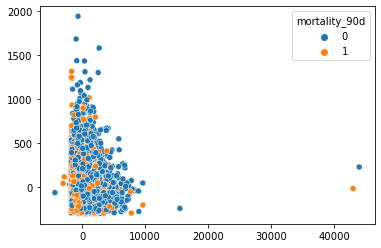

In [131]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca_data = pca_data.drop(10224,axis=0)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)

# 3. 模型的建立

In [ ]:
## Model

In [188]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [189]:
def ROC(y_test,y_score):
    fpr,tpr,threshold = roc_curve(y_test, y_score) ###計算真正率和假正率
    roc_auc = auc(fpr,tpr) ###計算auc的值
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率為橫座標，真正率為縱座標做曲線
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [320]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

In [191]:
def xgboost(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
    xgb_model.fit(X_train, y_train)
    out = xgb_model.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;

In [192]:
def forest(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    out = model.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;

In [193]:
def learn_curve(history):
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    # plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [334]:
def DNN(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    
    y_train = to_categorical(y_train, 2)
    y_test = to_categorical(y_test, 2)

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(32, input_shape=input_shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=5, verbose=1, validation_split=0.2)
    
    
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    learn_curve(history)
    
    return train_acc,test_acc

In [195]:
def confusion(pre,label):
    confmat = confusion_matrix(y_true=label, y_pred=pre)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
    plt.xlabel('predicted label')        
    plt.ylabel('true label')
    plt.show()

In [345]:
def LSR(data):
    # example of training a final regression model
    from sklearn.linear_model import LinearRegression
    from sklearn.datasets import make_regression
    from sklearn.metrics import mean_squared_error
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.los, test_size=0.2, random_state=42)
    # fit final model
    model = LinearRegression()
    model.fit(np.array(X_train), y_train)
    out = model.predict(np.array(X_test))
    return mean_squared_error(y_test,out),y_test-out
    #print(y_test)

<Figure size 432x288 with 0 Axes>

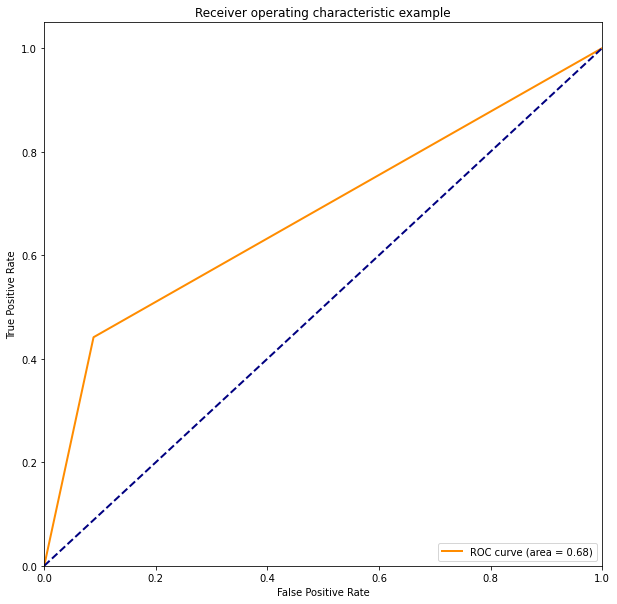

In [323]:
acc, pre, label = svm(imput_data)

In [324]:
acc

0.7678812415654521

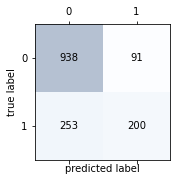

In [325]:
confusion(pre,label)

<Figure size 432x288 with 0 Axes>

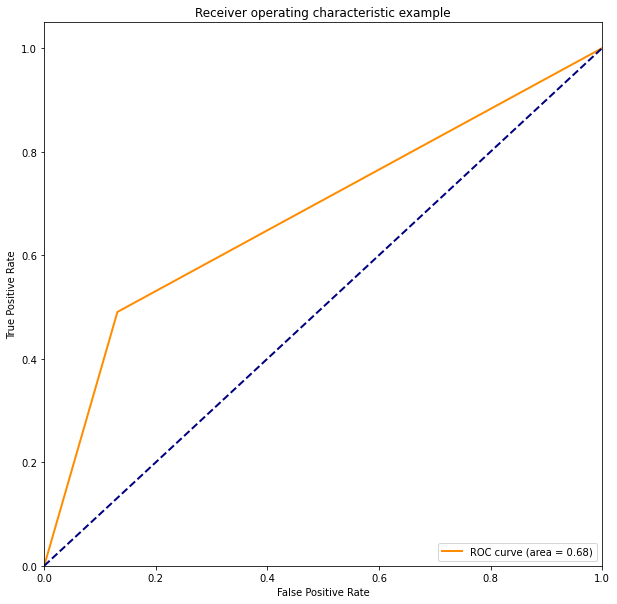

In [326]:
acc, pre, label = xgboost(imput_data)

In [327]:
acc

0.750253121835977

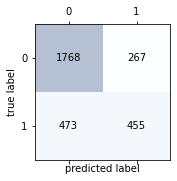

In [328]:
confusion(pre,label)

<Figure size 432x288 with 0 Axes>

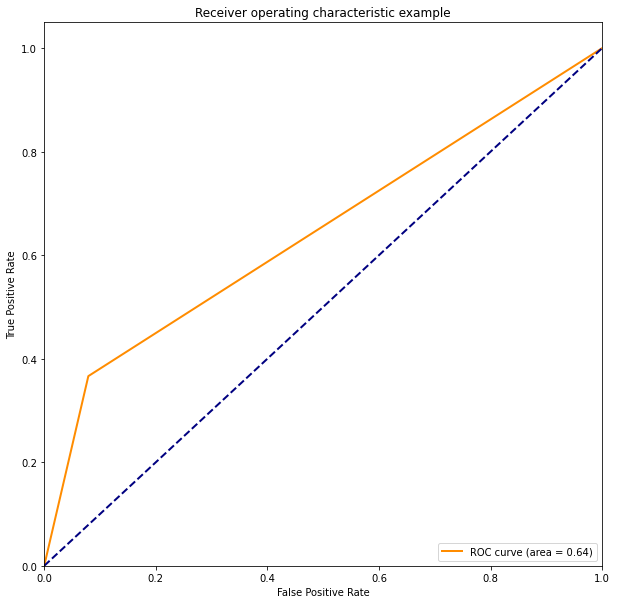

(0.7472156598042524,
 array([0, 1, 0, ..., 1, 0, 0]),
 9611     0
 8570     1
 2662     1
 11888    1
 14801    1
         ..
 12177    0
 11971    0
 5123     1
 8229     1
 4742     0
 Name: mortality_90d, Length: 2963, dtype: int64)

In [329]:
forest(imput_data)

In [330]:
acc

0.750253121835977

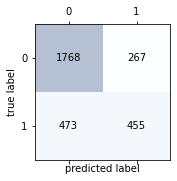

In [331]:
confusion(pre,label)

Epoch 1/10
1896/1896 [==============================] - 2s 823us/step - loss: 1.0901 - accuracy: 0.6626 - val_loss: 0.6249 - val_accuracy: 0.6827
Epoch 2/10
1896/1896 [==============================] - 1s 762us/step - loss: 0.6288 - accuracy: 0.6820 - val_loss: 0.6248 - val_accuracy: 0.6827
Epoch 3/10
1896/1896 [==============================] - 1s 769us/step - loss: 0.6253 - accuracy: 0.6822 - val_loss: 0.6248 - val_accuracy: 0.6827
Epoch 4/10
1896/1896 [==============================] - 1s 768us/step - loss: 0.6253 - accuracy: 0.6822 - val_loss: 0.6250 - val_accuracy: 0.6827
Epoch 5/10
1896/1896 [==============================] - 1s 789us/step - loss: 0.6252 - accuracy: 0.6822 - val_loss: 0.6249 - val_accuracy: 0.6827
Epoch 6/10
1896/1896 [==============================] - 1s 766us/step - loss: 0.6253 - accuracy: 0.6822 - val_loss: 0.6249 - val_accuracy: 0.6827
Epoch 7/10
1896/1896 [==============================] - 1s 774us/step - loss: 0.6253 - accuracy: 0.6822 - val_loss: 0.6250 -

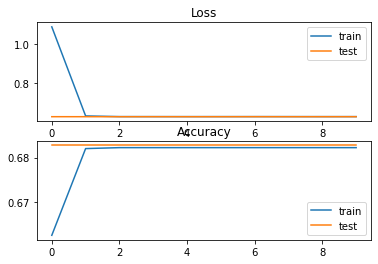

(0.6823092699050903, 0.686803936958313)

In [332]:
DNN(imput_data)

## 4. 分析步驟組裝 (以SVM作為範例)

## 4.1 去除缺值之分析

In [208]:
All_shape

,icustay_id,leavetime,los,age,mortality_90d,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,...,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean
86,250110,77.953333,3.3317,66,1,15.0,1.0,0.0,1.0,1.0,...,28.574468,37.388891,39.777777,38.500000,91.0,100.0,95.540541,158.0,337.0,265.208333
180,239427,169.686111,7.1455,67,1,14.0,6.0,5.0,3.0,0.0,...,25.361905,35.055556,37.055556,36.092593,43.0,100.0,92.804124,64.0,148.0,95.000000
240,211414,181.659167,7.6119,62,1,15.0,1.0,0.0,1.0,1.0,...,25.882353,35.833333,38.666667,37.701389,78.0,91.0,86.750000,104.0,425.0,285.684211
319,203682,12.067222,0.6129,56,0,3.0,1.0,1.0,1.0,0.0,...,26.421053,33.944444,36.444444,35.055556,88.0,100.0,96.333333,455.0,514.0,485.285714
434,270174,65.436944,2.7875,55,1,15.0,1.0,0.0,1.0,1.0,...,23.148936,35.222223,39.200001,37.634344,85.0,100.0,93.240000,45.0,266.0,131.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14344,218170,309.500833,12.8966,62,1,13.0,6.0,4.0,3.0,0.0,...,20.062500,36.944444,38.444444,37.916667,86.0,100.0,95.161290,118.0,118.0,118.000000
14434,266788,185.243056,7.8074,33,1,4.0,1.0,2.0,1.0,0.0,...,32.117647,35.888889,38.055556,37.452381,84.0,100.0,97.208333,48.0,124.0,80.125000
14459,274147,1606.468056,67.9735,78,1,15.0,1.0,0.0,1.0,1.0,...,22.909091,36.666667,37.333333,36.955556,94.0,100.0,96.666667,134.0,172.0,149.400000
14729,273084,12.615556,0.6021,77,1,15.0,6.0,5.0,4.0,0.0,...,19.785714,38.944444,38.944444,38.944444,56.0,100.0,89.750000,130.0,213.0,171.500000


<Figure size 432x288 with 0 Axes>

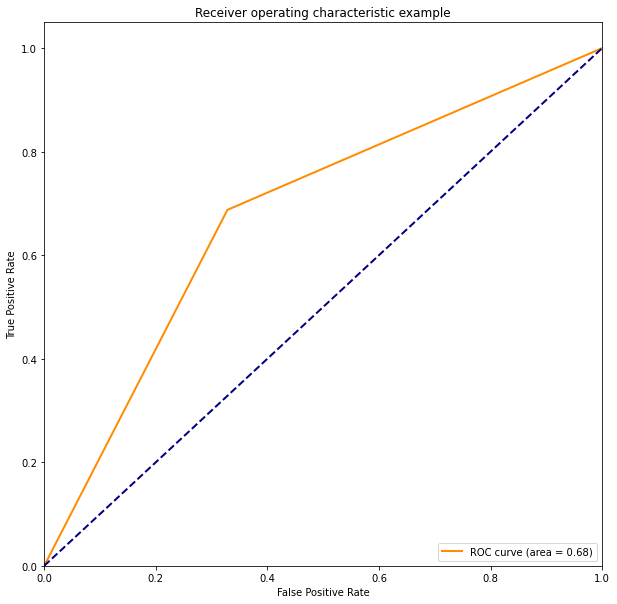

0.6782608695652174


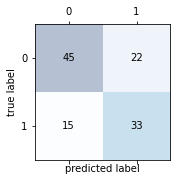

In [272]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.2, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

acc, pre, label = svm(All_shape.drop(["icustay_id"],axis=1))
print(acc)
confusion(pre,label)

## 4.2 使用KNNimpute+ExtraTreesClassifier

In [250]:
imput_data.head()

,age,mingcs,gcsmotor,gcsverbal,gcseyes,endotrachflag,aniongap_min,aniongap_max,albumin_min,albumin_max,...,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_min_y,glucose_max_y,glucose_mean,mortality_90d,los
0,58.0,15.0,6.0,0.0,3.0,1.0,17.0,17.0,2.40,2.45,...,38.333333,37.563492,97.0,100.0,99.384615,87.0,103.0,92.333333,1,9.8318
1,78.0,15.0,4.0,0.0,1.0,1.0,13.0,13.0,2.30,2.30,...,38.166665,37.063492,98.0,100.0,99.807692,74.0,108.0,88.200000,0,3.8644
2,58.0,13.0,6.0,4.0,3.0,0.0,16.0,16.0,2.45,2.45,...,36.833335,36.564815,94.0,100.0,98.909091,97.0,135.0,115.000000,0,1.3024
3,58.0,15.0,6.0,5.0,4.0,0.0,12.0,14.0,2.20,2.20,...,37.111113,36.666667,90.0,100.0,98.260870,87.0,205.0,129.250000,0,1.0441
4,58.0,15.0,6.0,5.0,4.0,0.0,13.0,16.0,2.60,2.60,...,37.277777,36.736112,62.0,100.0,97.486486,59.0,123.0,79.500000,0,13.8661


[2.52793949e-02 9.45644895e-03 8.79032333e-03 9.02271781e-03
 9.54291256e-03 5.62966989e-03 1.23371270e-02 1.16188182e-02
 1.17054502e-02 1.18204325e-02 1.08201891e-02 1.05676571e-02
 1.18213378e-02 1.14929578e-02 1.12614132e-02 1.22019187e-02
 1.06169836e-02 1.11409314e-02 1.04991479e-02 1.09914394e-02
 1.02282807e-02 9.90990805e-03 1.03178209e-02 1.03444694e-02
 1.02788658e-02 1.09329073e-02 1.31565292e-02 1.19528728e-02
 1.12087702e-02 1.14318082e-02 1.06804320e-02 1.05121649e-02
 1.11999651e-02 1.07919254e-02 1.17044677e-02 1.08804242e-02
 1.14866239e-02 1.05405695e-02 1.07281908e-02 1.06414414e-02
 1.48867226e-02 1.34621775e-02 1.08039596e-02 1.05202721e-02
 2.58539208e-02 3.59225407e-02 9.83943088e-03 9.54066884e-03
 6.62941095e-05 1.24960716e-02 2.22011607e-02 1.40980630e-02
 7.23602182e-03 8.16392686e-03 6.50058049e-03 9.25001730e-03
 1.13339114e-02 7.32582503e-03 2.45835616e-02 8.65285499e-03
 1.38198055e-02 1.09758350e-02 1.11307328e-02 1.09587019e-02
 1.06366369e-02 1.098998

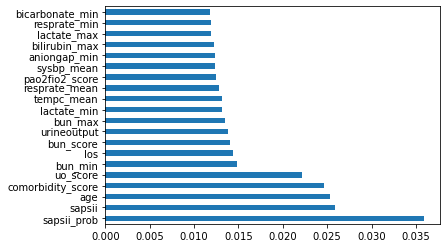

In [253]:
imput_data

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(imput_data.drop(["mortality_90d"],axis=1),imput_data.mortality_90d)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=imput_data.drop(["mortality_90d"],axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [270]:
imput_X = imput_data[imput_data.drop(["mortality_90d"],axis=1).columns[model.feature_importances_>0.01]]
imput_X["mortality_90d"] = imput_data["mortality_90d"]

<ipython-input-270-35473f8e8063>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_X["mortality_90d"] = imput_data["mortality_90d"]


<Figure size 432x288 with 0 Axes>

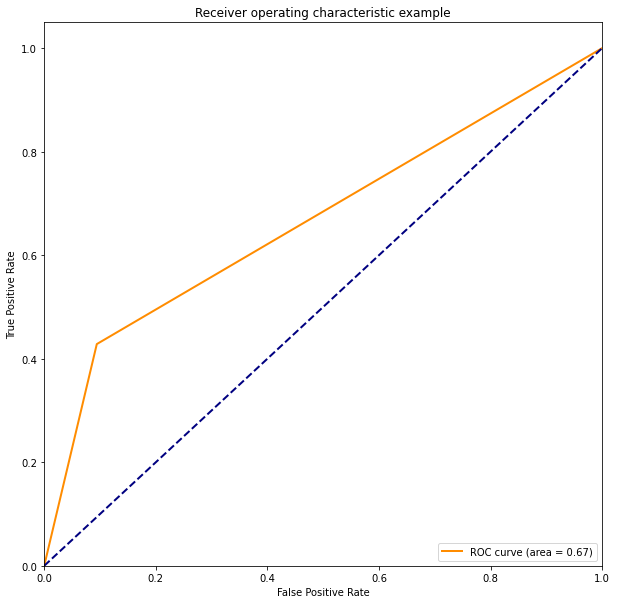

0.7597840755735492


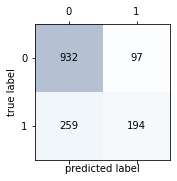

In [273]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

acc, pre, label = svm(imput_X)
print(acc)
confusion(pre,label)

## 4.3 使用KNNimpute+PCA去除樣本

In [279]:
imput_data.index = [n for n in range(imput_data.shape[0])]
imput_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14801, 14802, 14803, 14804, 14805, 14806, 14807, 14808, 14809,
            14810],
           dtype='int64', length=14811)

<AxesSubplot:>

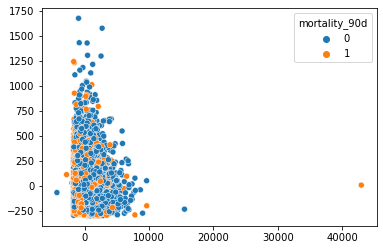

In [300]:
## 觀察樣本分佈狀況
import seaborn as sns
from sklearn.decomposition import PCA
pca_data = imput_data.drop(["los"],axis=1)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
pca_data = pca_data.drop([n for n in np.where(pca[:,0]>10)[0]],axis=0)
pca = PCA(n_components=10).fit_transform(pca_data.drop(["mortality_90d"],axis=1))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue = pca_data.mortality_90d)

<Figure size 432x288 with 0 Axes>

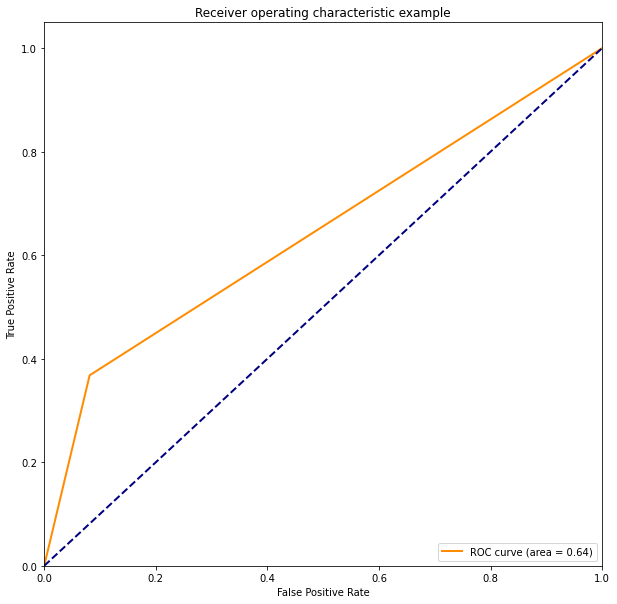

0.7331215250198571


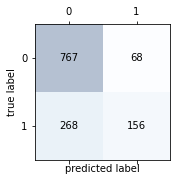

In [301]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

acc, pre, label = svm(pca_data)
print(acc)
confusion(pre,label)

## 4.4 使用KNNimpute+XGBoost特徵篩選

[0.02479569 0.00734546 0.01207062 0.01129153 0.01355333 0.01836686
 0.00895483 0.01263974 0.01000653 0.00908274 0.0078399  0.00960478
 0.01214425 0.00939435 0.01003167 0.00814449 0.01244799 0.0117321
 0.00843752 0.01201001 0.00809345 0.00741382 0.00721467 0.00888618
 0.00855262 0.01039044 0.01210538 0.00971662 0.01163319 0.01187538
 0.00804246 0.0082855  0.0085961  0.00837278 0.02899974 0.00842417
 0.01007545 0.00946823 0.01032413 0.00839257 0.01447065 0.00870951
 0.01097078 0.00940726 0.09198679 0.         0.00853258 0.0123644
 0.         0.00950448 0.00250962 0.03276011 0.00481474 0.01197601
 0.00082292 0.00750165 0.01615398 0.         0.04124934 0.01920285
 0.0173597  0.01077606 0.00910703 0.01034076 0.00925655 0.00935627
 0.0096971  0.00911878 0.00796076 0.0097993  0.00791242 0.00935083
 0.01004502 0.0101974  0.00910928 0.01219289 0.0098984  0.00962313
 0.01116428 0.00998047 0.00835324 0.01022119 0.00764973 0.00797936
 0.00922417 0.01663104]


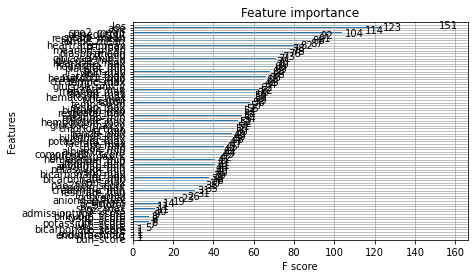

In [303]:
from xgboost import XGBClassifier

from xgboost import plot_importance
model = XGBClassifier()
model.fit(imput_data.drop(["mortality_90d"],axis=1),imput_data.mortality_90d)
# feature importance
print(model.feature_importances_)
# plot
plot_importance(model)
pyplot.show()

In [318]:
imput_G = imput_data[imput_data.drop(["mortality_90d"],axis=1).columns[model.feature_importances_>0.01]]
imput_G["mortality_90d"] = imput_data["mortality_90d"]

<ipython-input-318-dcb4201f06b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imput_G["mortality_90d"] = imput_data["mortality_90d"]


<Figure size 432x288 with 0 Axes>

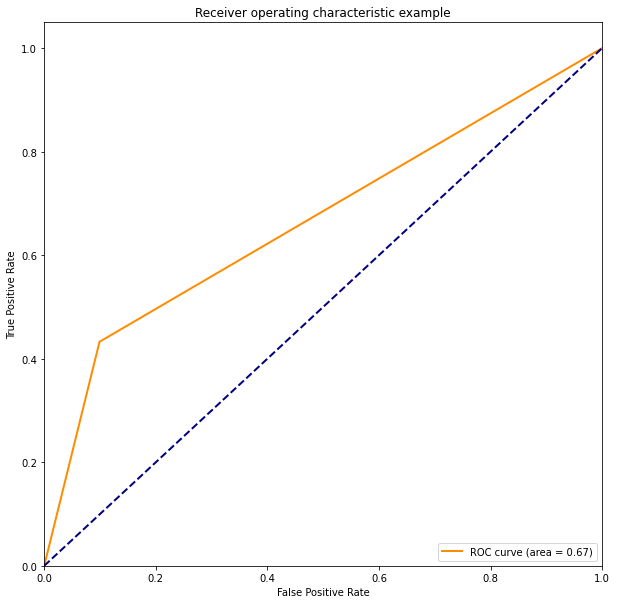

0.7577597840755735


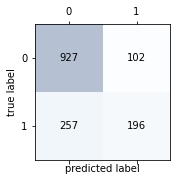

In [319]:
def svm(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    ROC(y_test, out)
    return accuracy_score(y_test, out), out, y_test;
    

acc, pre, label = svm(imput_G)
print(acc)
confusion(pre,label)

## 4.5 DNN

In [339]:
def DNN(data):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(["mortality_90d"],axis=1)
                                                    ,data.mortality_90d, test_size=0.1, random_state=42)
    
    y_train = to_categorical(y_train, 2)
    y_test = to_categorical(y_test, 2)

    input_shape = (X_train.shape[1],)

    # Create the model
    model = Sequential()
    model.add(Dense(16, input_shape=input_shape, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=1, validation_split=0.2)
    
    
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    learn_curve(history)
    
    return train_acc,test_acc

In [ ]:
DNN(imput_data)

## 4.6 預測在ICU病房時間

In [347]:
LSR(All_shape.drop('icustay_id',axis=1))

(2.070780348003104e-27,
 13013   -5.151435e-14
 1830     7.105427e-15
 3182     7.105427e-15
 10673   -4.440892e-14
 13898   -4.973799e-14
              ...     
 1893     1.598721e-14
 6432     2.597922e-14
 13519    1.154632e-14
 12815    5.329071e-15
 1811    -2.886580e-14
 Name: los, Length: 115, dtype: float64)